# Lineáris algebrai függvények a numpy-ban, eredmények vizualizációja (matplotlib)

## Lineáris algebrai egyenletrendszer megoldása

Mivel nagyon sok matematikai probléma megoldása visszavezethető lineáris egyenletrendszerek megoldására, gyakorlatilag minen tudományos programozási tartalmaz, tipikusan több, függvényt, melyek segítségével ezen egyenletrendszereket lehet megoldani.  

A legyegyszerűbb egyenletrendszer alakja:

$$
    \mathbf{A} \mathbf{x} = \mathbf{b}
$$

ahol,
- $\mathbf{A}$ egy $m \times n$-es mátrix,
- $\mathbf{x}$ egy $n$ ismeretlen elemet tartalmazó vektor,
- $\mathbf{b}$ egy $m$ ismeret elemet tartalmazó vektor.

A `linalg` a numpy egy alcsomagja, mely alapvető lineáris algebrai függvényeket tartalmaz. A csomagot elérhetjük a numpy-on keresztül is (`np.linalg`) vagy importálhatjuk külön az alábbi szintaxis segítségével:

In [3]:
import numpy as np
from numpy import linalg as lin, random as rng

A következő parancs a fenti sorral ekvivalens.

In [4]:
lin, rng = np.linalg, np.random

A `random` numpy alcsomag `randn` függvényével generáljunk egy 4 soros és 5 oszlopos mátrixot és egy 4 elemet tartalmazó sorvektort. Az `A` változó az egyenletrendszer bal oldalán található mátrix, a `b` az egyenletrendszer jobb oldalán található vektor.

In [12]:
A, b = rng.randn(4, 5) + 1, rng.rand(4)
print(right, "\n\n", left)

[0.68228285 0.11896684 0.26104359 0.43257311] 

 [[ 2.52854648 -0.15615198 -0.29420644 -0.37345225 -0.07416844]
 [ 0.10275556  2.50303052  2.01927006  2.68481852  0.997359  ]
 [-0.08850435 -1.14297741  0.69632436  1.04355615  0.58974848]
 [ 2.1998651   1.78694929  0.86801932  2.17698563  3.14474119]]


A `help` függvény segítségével lehet egy adott függvény dokumentációját kinyomtatni. A lináris algebra csomag <q>igásló</q> függvénye az `lstsq` (least squares) függvény. A nevéhez híven a függvény egy adott egyenletrendszerhez kiszámolja a legkisebb négyzetes értelmeben vett legjobb megoldást.

A dokumentációból kiolvasható, hogy a függvény 4 változóval tér vissza, feltéve, hogy a megoldás keresése során nem következett be hiba. Számunkra az első változó, a megoldás vektor lesz hasznos.

In [2]:
help(lin.lstsq)

Help on function lstsq in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation :math:`a x = b` by computing a vector `x` that
    minimizes the squared Euclidean 2-norm :math:`\| b - a x \|^2_2`.
    The equation may be under-, well-, or over-determined (i.e., the
    number of linearly independent rows of `a` can be less than, equal
    to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
       

A `_` karakter segítségével elvethetjük a további három visszatérési értéket. A függvény figyelmeztet minket, hogy a jövőben meg fog változni a függvény argumentumainak viselkedése, számunkra ez most nem lényeges.

In [15]:
x, _, _, _ = lin.lstsq(A, b)

/home/istvan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Alternatív módon a 4 visszatérési értékből kiválaszthatjuk a legelsőt. (Ha több visszatérési értékünk van, azt a Python egy tuple-ként kezeli, amit tudunk indexelni.)

In [48]:
x = lin.lstsq(A, b, rcond=None)[0]

A megoldás vektor értékei.

In [17]:
x

array([-0.38436199,  0.70038243,  0.0313084 , -0.18822608,  0.20870955])

Az alább definiált root-mean-square függvény segítségével kiszámíthatjuk a legkisebb négyzetes értelemben vett eltérési értéket a $\mathbf{A} \mathbf{x} - \mathbf{b}$ kifejezésnek.

$\mathrm{RMS}(\mathbf{x}) = \sqrt{\left(\sum_i^N x_i^2 \right) N^{-1}}$

In [18]:
def rms(array):
    # gyökvonás
    return np.sqrt(
        # elemek négyzetreemelése és a négyzetősszeg kiszámítása
        np.sum(array**2) /
        # elemszámmal osztás
        array.size
    )

Az `@` operátor segítségével tudjuk az $\mathbf{A}$ mátrixot és a $\mathbf{x}$ vektort összeszorozni.

Láthatjuk, hogy az RMS érték, elényészően kicsi, tehát az egyenletrendszer megoldása sikeres volt.

In [22]:
rms(A @ x - b)

2.254873622441467e-16

## Polinomillesztés, bevezetés a matplotlib-be

A fenti példán keresztül láttuk, hogyan lehet lineáris egyenletrendszert megoldani a numpy segítségével. Az egyenletrndszer együtthatóit random módon generáltuk, a kapott megoldásnak nem volt <q>fizikai</q> értelme.

Most nézzünk meg egy <q>klasszkus</q> példát, ahol a megoldás vektor elemei értelmezhetőek. Illesszünk adatokra egy polinomot.

A polinom alakja legyen a következő:

$$
    p(x,\mathbf{a}) = \sum_{i=0}^n a_i x^i
$$

ahol $a$ az együtthatók vektora, $n$ a polinom foka. $m$ darab $(x_j, y_j)$ koordinátapár áll rendelkezésünkre, $j \in [1,m]$. A koordinátapárokra szeretnénk polinomot illeszteni, ehhez legkisebb négyzetes értelemben minimalizáljuk a 

$$
    \left(\sum_{j=1}^m [p(x_j, \mathbf{a}) - y_j]^2\right)^{1/2}
$$

kifejezés értékét.


A legkisebb négyzetek módszerét alkalmazva, itt nem részletezve a számításokkal, a következő egyenletrendszerre jutunk:

$$
    A_{i,j} a_j = y_i
$$

ahol,
$$
    A_{i,j} = \frac{\partial p(x_i,\mathbf{a})}{\partial a_j} = x_i^j.
$$

Kifejtve:
$$
    \mathbf{A} =
    \begin{bmatrix}
        1 & x_1 & x_1^2 & \dots & x_1^{n-1} \\
        1 & x_2 & x_2^2 & \dots & x_2^{n-1} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_m & x_m^2 & \dots & x_m^{n-1}
    \end{bmatrix}
$$

$$
    \mathbf{a} = 
    \begin{bmatrix}
        a_0 \\
        a_1 \\
        \vdots \\
        a_n
    \end{bmatrix}
$$

$$
    \mathbf{b} = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_m
    \end{bmatrix}
$$

Tehát elő kell állítanunk az $\mathbf{A}$ mátrixot az $x$ értékek segítségével, majd az egyenletrendszert megoldva megkapjuk az $\mathbf{a}$ együtthatók értékét. Az $\mathbf{A}$ mátrixot az irodalomban szokás alak- vagy tervmátrixnak (design matrix) nevezni. Jelen esetben ez egy speciális ún. [Vandermonde-mátrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

Állítsunk elő teszt adatsorokat:

In [51]:
# x értékek vetkora
x = np.linspace(0.0, 10.0, 25)

# együtthatók vektora
a = np.array([2.0, 3.5, 0.2])

# y értékek vektora
y = a[0] + a[1] * x + a[2] * x**2

# zajos y értékek vetkora
y_noise = y + rng.rand(y.shape[0])

In [49]:
def polyfit(x, # x értékek vetkora
            y, # y értékek vetkora
            deg # illesztett polinom foka
    ):
    
    # alakmátrix, 
    design = np.empty((x.size, deg + 1))
    
    # első oszlop értéke mindenhol 1.0
    design[:,0] = 1.0
    
    # második oszlop értéke mindenhol az x vektor értékei
    design[:,1] = x
    
    # további oszlopok értékei az x vektor elemeinek különböző hatványai
    for ii in range(2, deg + 1):
        design[:,ii] = x**ii
    
    # egyenletrendszer megoldása
    return lin.lstsq(design, y, rcond=None)[0]

Függvény próbája.

In [52]:
p = polyfit(x, y, 2)
p, a

(array([2. , 3.5, 0.2]), array([2. , 3.5, 0.2]))

A kapott `p` vektor tartalmazza a polinom együtthatók értékei. Látjuk, hogy a zaj nélküli adatok esetén visszakapjuk az eredeti együtthatókat.

In [53]:
p = polyfit(x, y_noise, 2)
p, a

(array([2.46878172, 3.50235922, 0.20126268]), array([2. , 3.5, 0.2]))

Zajos adatokaesetén természetesen nem kapjuk vissza tőkéletesen az eredeti értékeket.

In [31]:
rms(p - a)

0.21399515063321375

A különbségek RMS értéke nem elhanyagolhatóak, de továbbra is kicsik.

## Rövid kitérő: indexelés Pythonban, numpy-ban

Matlabtól eltérően a Python-ban az indexek 0-tól kezdődnek. Matlabhoz hasonlóan a Pythonban is lehetséges tőbb elem kiválasztása:

Első elemet kivéve minden elem kiválasztása. 

In [34]:
p[1:]

array([3.5131803 , 0.19845204])

A második elemtől a harmadik elemig (a harmadik elem nem kerül kiválasztásra) minden elem kiválasztása. Jelen esetben ez csak a második elem lesz.

In [36]:
p[1:2]

array([3.5131803])

Harmadik elemtől az első elemig az elemek kiválasztása, fordított sorrendben (2. és 1. elemet kapjuk meg; `-1` jelzi, hogy visszafele lépünk egyesével).

In [35]:
p[2:0:-1]

array([0.19845204, 3.5131803 ])

Minden második elem kiválasztása (0. és 2. elemet kapjuk meg; `2` jelzi, hogy kettesével lépünk).

In [37]:
p[::2]

array([2.37041282, 0.19845204])

Összes elem kiválasztása fordított sorrendben.

In [38]:
p[::-1]

array([0.19845204, 3.5131803 , 2.37041282])

A polinom kiértékeléséhez felhasználhatjuk a numpy `polyval` függvényét. A függvény első argumentuma a polinom együtthatók vektora, a második argumentum az `x` értékek vektora, ahol a polinomot szeretnénk kiértékelni. **Figyelem:** a polinom együtthatókat fordított sorrendben (legnagyobb hatvány együtthatótól a legkisebb hatvány együtthatójáig) kell megadnunk.

Zajos adatosrra illesztett polinom együtthatókkal kiértékelt $y$ értékek és RMS eltérése az eredeti értékektől.

In [42]:
yy = np.polyval(p[::-1], x)

rms(yy - y)

0.38390550149327374

## Eredmények vizualizációja, matplotlib bevezető

A kapott polinomot kirajzolhatjuk `matplotlib` csomag segítségével. A csomagot úgy írták meg, hogy a függvények nevei és viselkedése hasonlítson a Matlabban megszokott rajzolási függvények neveihez és viselkedéséhez.

In [45]:
# plot csomag importálása
import matplotlib.pyplot as plt

# parancs, mellyel a notebook-ba közvetlenül rajzolhatjuk
%matplotlib inline

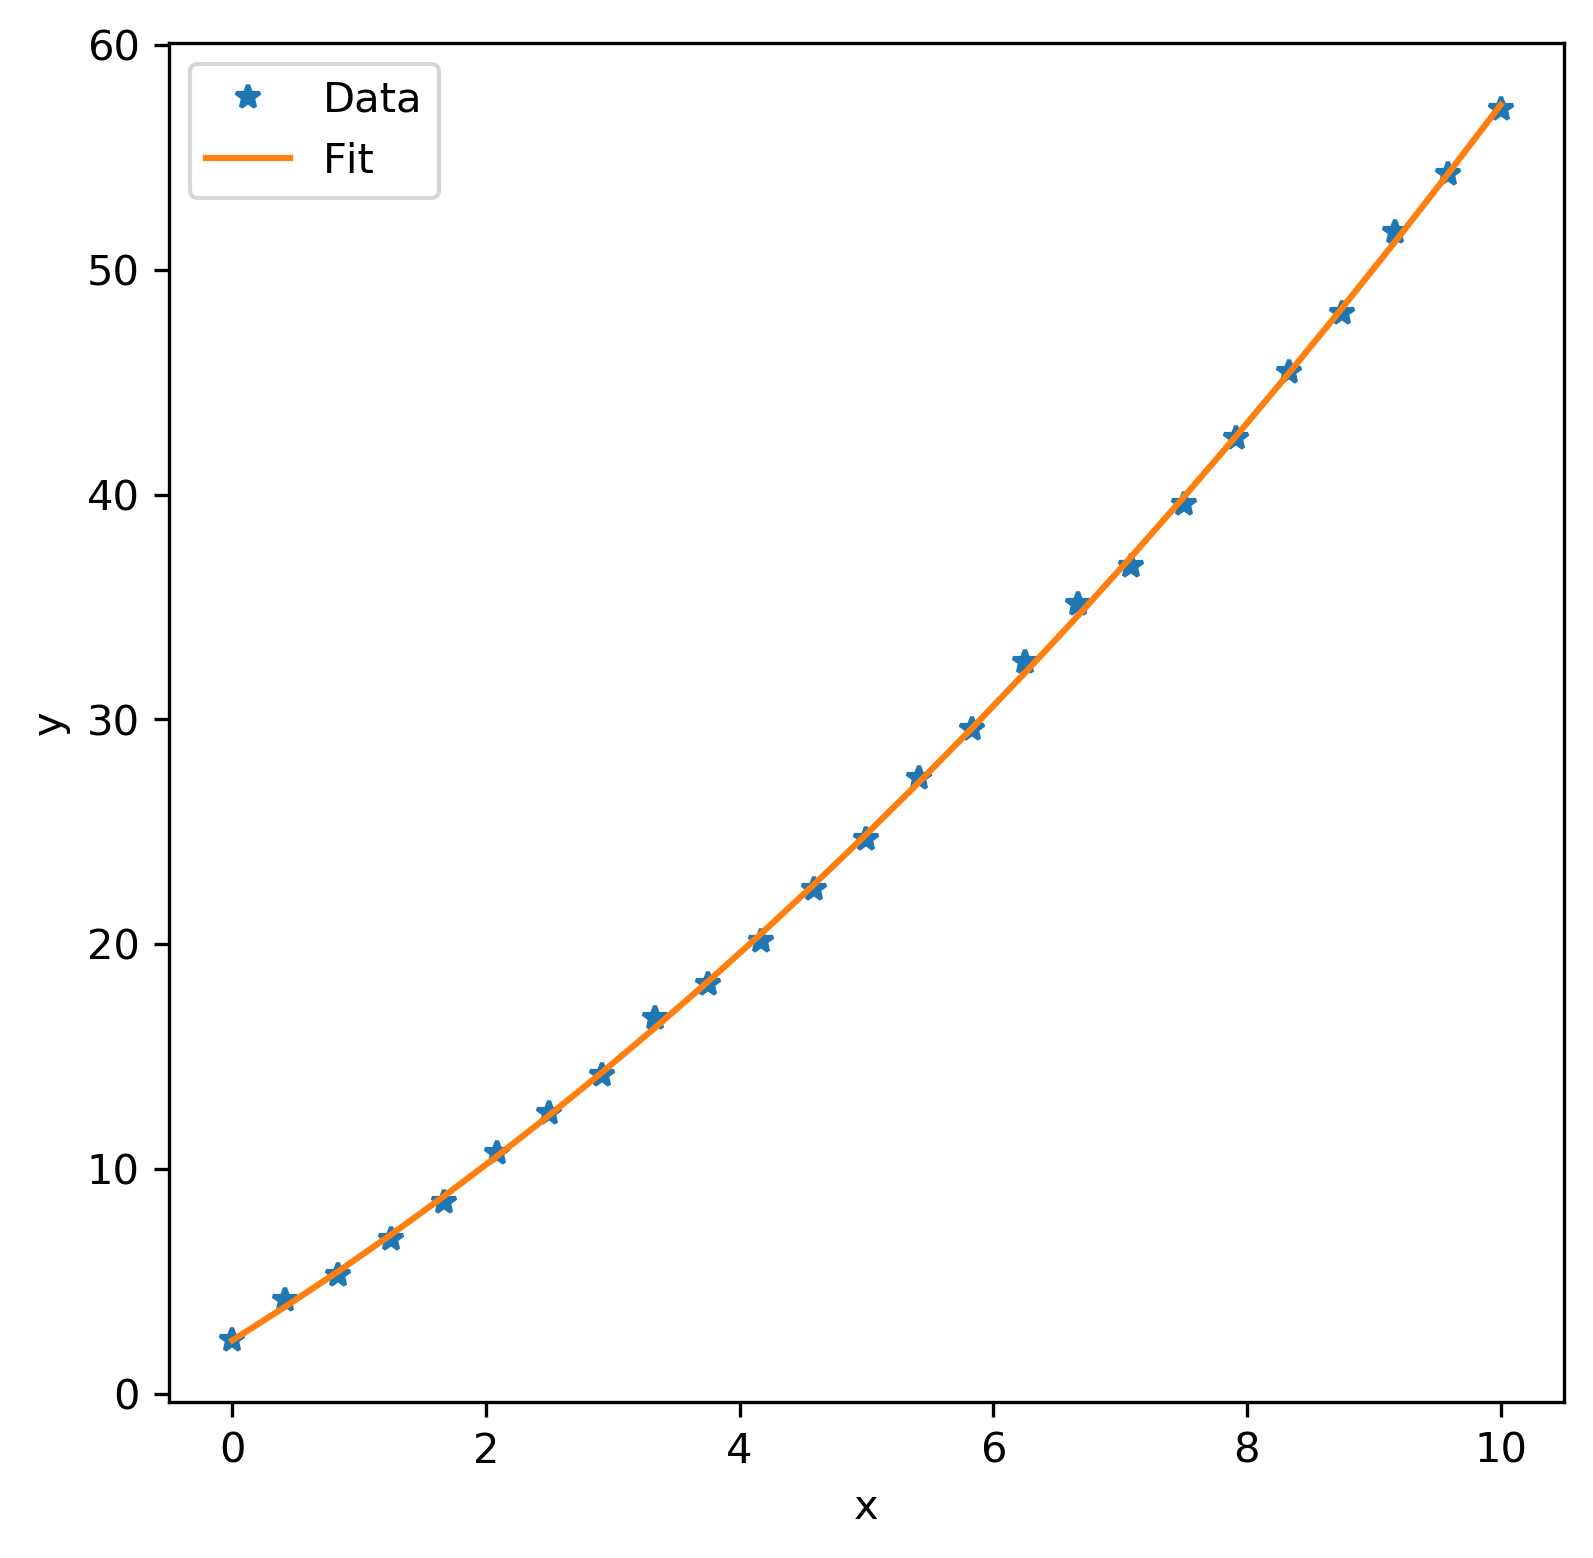

In [47]:
# üres ábra létrehozása
f = plt.figure(
    # ábra mérete inch-ben
    figsize=(6, 6),
    # dpi felbontása
    dpi=300
)

# zajos adatok kirajzolása csillag szimbólumokkal
plt.plot(x, y_noise, "*", label="Data")

# illesztett polinom kirajzolása folytonos vonallal
plt.plot(x, yy, "-", label="Fit")

# jelmagyarázat hozzáadása
plt.legend()

# tengelyek feliratozása
plt.xlabel("x")
plt.ylabel("y")

# ábra kimentése png fájlba, más formátumok is támogatottak
f.savefig("assets/fit.png")

Látható, hogy a polinomunk jól illeszkedik a zajos adatsorra, az illesztés sikeres volt.

A következő fejezetben a scipy csomag néhány függvényével ismerkedünk meg.